<a href="https://colab.research.google.com/github/Exion007/Colab/blob/main/pandas_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd

In [48]:
# How to create DataFrames

# Specify values for each column
df1 = pd.DataFrame(
{ "a" : [4, 5, 6],
  "b" : [7, 8, 9],
  "c" : [10, 11, 12]
},
  index = [1, 2, 3])

# Specify values for each row
df2 = pd.DataFrame(
[ [4, 5, 6],
  [7, 8, 9],
  [10, 11, 12]
],
  index=[1, 2, 3],
  columns=['a', 'b', 'c'])

# Create DataFrame with a MultiIndex
df3 = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = pd.MultiIndex.from_tuples(
[('d', 1), ('d', 2),
 ('e', 2)],
 names=['n', 'v']))

print(df1, "\n")
print(df2, "\n")
print(df3, "\n")
df3

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12 

    a   b   c
1   4   5   6
2   7   8   9
3  10  11  12 

     a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12 



a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [49]:
# Reshaping Data

df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
print(df,"\n")

# .melt()
print(df.melt(id_vars=['A'], value_vars=['B']), "\n")
print(df.melt(id_vars=['A'], value_vars=['B', 'C']), "\n")
print(df.melt(id_vars=['A'], value_vars=['B'],
      var_name='VarName', value_name='ValName'), "\n")
df.columns = [list('ABC'), list('DEF')]
print(df)

   A  B  C
0  a  1  2
1  b  3  4
2  c  5  6 

   A variable  value
0  a        B      1
1  b        B      3
2  c        B      5 

   A variable  value
0  a        B      1
1  b        B      3
2  c        B      5
3  a        C      2
4  b        C      4
5  c        C      6 

   A VarName  ValName
0  a       B        1
1  b       B        3
2  c       B        5 

   A  B  C
   D  E  F
0  a  1  2
1  b  3  4
2  c  5  6


# Reshaping Data

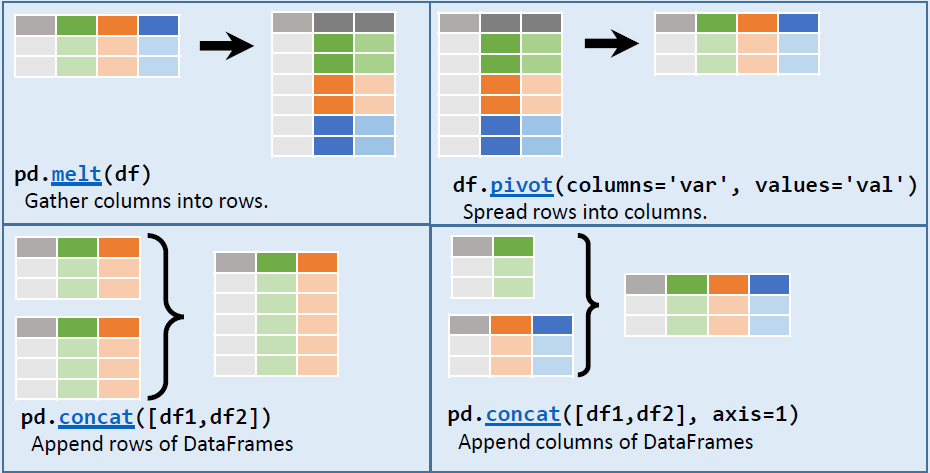

* .melt() -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html?highlight=melt#pandas.DataFrame.melt

* .pivot() -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html?highlight=pivot#pandas.DataFrame.pivot

* .concat() -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat

In [50]:
# Reading csv files using Pandas
# First, upload the file; then, run the code

df = pd.read_csv("movies.csv")
df.head(3)

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN


In [51]:
print(f'Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}')

Number of rows: 10000
Number of columns: 14


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   release_date          9979 non-null   object 
 3   genres                10000 non-null  object 
 4   original_language     10000 non-null  object 
 5   vote_average          10000 non-null  float64
 6   vote_count            10000 non-null  int64  
 7   popularity            10000 non-null  float64
 8   overview              9923 non-null   object 
 9   budget                10000 non-null  int64  
 10  production_companies  10000 non-null  object 
 11  revenue               10000 non-null  int64  
 12  runtime               10000 non-null  int64  
 13  tagline               7241 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [53]:
# Given the id of the film, how to reach its info?
df.loc[493]

id                                                                    155
title                                                     The Dark Knight
release_date                                                   2008-07-14
genres                           ['Drama', 'Action', 'Crime', 'Thriller']
original_language                                                 English
vote_average                                                          8.5
vote_count                                                          29634
popularity                                                         81.582
overview                Batman raises the stakes in his war on crime. ...
budget                                                          185000000
production_companies    ['DC Comics', 'Legendary Pictures', 'Syncopy',...
revenue                                                        1004558444
runtime                                                               152
tagline                               

In [54]:
# How to get the row(s) based on a column value?,

# 1 - df.loc[df['col1'] == value]\n",
# 2 - df.loc[df['col1'].isin([value1, value2, value3, ...])]
# 3 - df.loc[(df['col1'] == value) & (df['col2'] < value)]

#df.loc[df.title == "The Dark Knight"]
#df.loc[df["title"].isin(["Batman Begins", "The Dark Knight", "The Dark Knight Rises"])]
df.loc[(df['vote_average'] > 8.5) & (df['runtime'] > 150)]

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
317,238,The Godfather,1972-03-14,"['Drama', 'Crime']",English,8.7,17865,113.216,"Spanning the years 1945 to 1955, a chronicle o...",6000000,"['Paramount', 'Alfran Productions']",245066411,175,An offer you can't refuse.
946,424,Schindler's List,1993-12-15,"['Drama', 'History', 'War']",English,8.6,14028,57.910,The true story of how businessman Oskar Schind...,22000000,['Amblin Entertainment'],321365567,195,"Whoever saves one life, saves the world entire."
966,240,The Godfather Part II,1974-12-20,"['Drama', 'Crime']",English,8.6,10802,55.942,In the continuing saga of the Corleone crime f...,13000000,"['Paramount', 'The Coppola Company']",102600000,202,"I don't feel I have to wipe everybody out, Tom..."
3528,19404,Dilwale Dulhania Le Jayenge,1995-10-19,"['Comedy', 'Drama', 'Romance']",Hindi,8.6,4121,23.413,"Raj is a rich, carefree, happy-go-lucky second...",13200000,['Yash Raj Films'],100000000,190,"Come Fall In love, All Over Again.."
9807,1049767,The Chosen: Season 3 - Episodes 1 & 2,2022-11-18,"['Drama', 'History']",English,10.0,1,11.178,After Jesus completes a sermon that turns the ...,0,['Angel Studios'],0,160,NaN


In [55]:
# How to filter data?

print(f'Before filtering:\nNumber of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}\n')

# Delete rows containing "NULL" value using dropna()
newdf = df.dropna()

# Set inplace parameter as True, if you want the filtering operation to be conducted on the original dataframe
# df.dropna(inplace = True)

print(f'After filtering:\nNumber of rows: {newdf.shape[0]}\nNumber of columns: {newdf.shape[1]}')

Before filtering:
Number of rows: 10000
Number of columns: 14

After filtering:
Number of rows: 7240
Number of columns: 14


In [56]:
# How to group columns?

# You can use column names to select the columns you want to use.
# df.loc[:, ['column1', 'column3', 'column4']]

# You may use both column indices or their names in order to group them.
# You can also create a seperate dataframe which contains only the columns that you selected.
# !! Compared to loc(), iloc() takes indices as parameters

df.iloc[:5,]             # First 5 rows
df.iloc[1:5,]            # Second to Fifth row
df.iloc[5,0]             # Sixth row and 1st column
df.iloc[1:5,0]           # Second to Fifth row, first column
df.iloc[1:5,:5]          # Second to Fifth row, first 5 columns
newdf = df.iloc[2:7,1:3] # Third to Seventh row, 2nd and 3rd column
newdf.head()

,title,release_date
2,The Super Mario Bros. Movie,2023-04-05
3,Ghosted,2023-04-18
4,Shazam! Fury of the Gods,2023-03-15
5,Avatar: The Way of Water,2022-12-14
6,Guardians of the Galaxy Volume 3,2023-05-03


In [57]:
# Filtering based on a column value
#newdf = df[df["release_date"].notna()]
#newdf = df.drop(df.loc[df["vote_average"] < 8.5].index)

# Filtering based on column names
# Note: In addition to the indices method we used above, we can also use column names.

to_del = ["original_language", "vote_count", "production_companies", "tagline", "popularity", "overview"]
newdf = df.drop(to_del, axis=1)
newdf.head()

,id,title,release_date,genres,vote_average,budget,revenue,runtime
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",7.4,18000000,65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",6.6,200000000,464566092,125
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",7.5,100000000,1121048165,92
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",7.2,0,0,120
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",6.8,125000000,133437105,130


In [58]:
# Order rows by values of a column
newdf.sort_values("runtime", ascending = False, inplace = True)
newdf.head()

# !! Set ascending = True if you want to sort the rows from low to high (ascending is True by default)


,id,title,release_date,genres,vote_average,budget,revenue,runtime
4740,537268,Blood Curse,2023-02-25,"['Drama', 'Horror', 'TV Movie', 'Thriller']",8.3,0,0,449
9127,3870,1900,1976-09-01,"['Drama', 'History']",7.9,9000000,0,317
6970,715742,Trenque Lauquen,2023-05-02,"['Mystery', 'Romance', 'Drama']",7.0,0,0,260
5394,10655,Gettysburg,1993-10-08,"['Drama', 'History', 'War']",6.9,25000000,12700000,254
2831,8095,Cleopatra,1963-06-12,"['Drama', 'History', 'Romance']",7.1,44000000,71000000,248
